In [108]:
# Libraries
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from googletrans import Translator

##### READ THE DATA

In [109]:
# read all test data I have
amr_data1 = pd.read_csv("New_test_data.txt", sep="\t", header=None) #2002-2015
amr_data2 = pd.read_excel("AMR data.xlsx") #2018
amr_data3 = pd.read_excel("AMR data 2017.xlsx") #2017

In [110]:
# read all consumption data I have
consumption_data1 = pd.read_excel('consumption_2013.xlsx') #2013
consumption_data2 = pd.read_csv('Drug Consumption data.csv') #2014-2017

##### RENAMING THE COLUMNS AND DIMENTION REDUCTION

In [112]:
# amr_data1
amr_data1 = amr_data1.rename(index=str, columns={0: "Year", 1:"NumeroConferimento", 6:"Active_principle", 7:"Farm_ID", 9:"Result", 10:"Bacteria", 12:"Kind"}) # this data was without header, renaming of columns 
amr_data1 = amr_data1[['Year', 'NumeroConferimento', 'Active_principle', 'Farm_ID', 'Result', 'Bacteria', 'Kind']] # the columns I need
amr_data1 = amr_data1.loc[amr_data1['Kind'].isin(['SUINO', 'SUINO - SVEZZAMENTO', 'SUINO - SOTTOSCROFA', 'SUINO - MAGRONE', 'SUINO - SCROFETTA', 'SUINO - INGRASSO', 'SUINO - SCROFA', 'SUINO - VERRO', 'SUINO DI RAZZA MORA', 'SUINO DI RAZZA CINTA SENESE'])] # Only Suino

In [46]:
# amr_data2
amr_data2 = amr_data2.rename(index=str, columns={'AnnoConferimento': "Year", 'Antibiotico':"Active_principle", 'Codice_Allevix':"Farm_ID", 'Risultato':"Result", 'AgenteEziologico':"Bacteria", 'Specie':"Kind"}) # this data was with italian header, renaming of columns 
amr_data2 = amr_data2[['Year', 'NumeroConferimento', 'Active_principle', 'Farm_ID', 'Result', 'Bacteria', 'Kind']] # the columns I need
amr_data2 = amr_data2.loc[amr_data2['Kind'].isin(['SUINO', 'SUINO - SVEZZAMENTO', 'SUINO - SOTTOSCROFA', 'SUINO - MAGRONE', 'SUINO - SCROFETTA', 'SUINO - INGRASSO', 'SUINO - SCROFA'])] # Only Suino

In [47]:
# amr_data3
amr_data3 = amr_data3.rename(index=str, columns={'AnnoConferimento': "Year", 'Antibiotico':"Active_principle", 'Codice_Allevix':"Farm_ID", 'Risultato':"Result", 'AgenteEziologico':"Bacteria", 'Specie':"Kind"}) # this data was with italian header, renaming of columns 
amr_data3 = amr_data3[['Year', 'NumeroConferimento', 'Active_principle', 'Farm_ID', 'Result', 'Bacteria', 'Kind']] # the columns I need
amr_data3 = amr_data3.loc[amr_data3['Kind'].isin(['SUINO', 'SUINO - SVEZZAMENTO', 'SUINO - SOTTOSCROFA', 'SUINO - MAGRONE', 'SUINO - SCROFETTA', 'SUINO - INGRASSO', 'SUINO - SCROFA', 'SUINO - VERRO'])] # Only Suino

In [48]:
# consumption_data1
consumption_data1 = consumption_data1[['PK_Somministrazione', 'IdAllevamento', 'Year', 'CicloAperto', 'CicloChiuso', 
                     'Sito1', 'Sito3', 'TipoFarmaco', 'Target', 'PrincipioAttivo', 'PrincipioSomministratoMg',
                     'DDDA_Mille','DCDA_Mille']] # the columns I need

consumption_data1 = consumption_data1.rename(index=str, columns={'Year': "Year", 'PK_Somministrazione':"PK_Somministrazione", 'IdAllevamento':"Farm_ID", 'PrincipioAttivo':"Active_principle", 'CicloAperto': 'Open_cycle', 'CicloChiuso': 'Close_cycle', 
                     'Sito1': 'Site1', 'Sito3': 'Site3', 'TipoFarmaco': 'Type_of_medication', 'Target': 'Target', 'PrincipioSomministratoMg': 'Active_principle_mg',
                     'DDDA_Mille': 'DDDA','DCDA_Mille': 'DCDA'}) # rename in English

In [49]:
# consumption_data2
consumption_data2 = consumption_data2[['PK_Somministrazione', 'IdAllevamento', 'n_AnnoSomm', 'CicloAperto', 'CicloChiuso', 
                     'Sito1', 'Sito3', 'TipoFarmaco', 'Target', 'PrincipioAttivo', 'PrincipioSomministratoMg',
                     'DDDA_Mille','DCDA_Mille']] # the columns I need

consumption_data2 = consumption_data2.rename(index=str, columns={'n_AnnoSomm': "Year", 'PK_Somministrazione':"PK_Somministrazione", 'IdAllevamento':"Farm_ID", 'PrincipioAttivo':"Active_principle", 'CicloAperto': 'Open_cycle', 'CicloChiuso': 'Close_cycle', 
                     'Sito1': 'Site1', 'Sito3': 'Site3', 'TipoFarmaco': 'Type_of_medication', 'Target': 'Target', 'PrincipioSomministratoMg': 'Active_principle_mg',
                     'DDDA_Mille': 'DDDA','DCDA_Mille': 'DCDA'}) # rename in English

##### UPPERCASE

In [50]:
amr_data1 = amr_data1.applymap(lambda s:s.upper() if type(s) == str else s)
amr_data2 = amr_data2.applymap(lambda s:s.upper() if type(s) == str else s)
amr_data3 = amr_data3.applymap(lambda s:s.upper() if type(s) == str else s)

In [51]:
consumption_data1 = consumption_data1.applymap(lambda s:s.upper() if type(s) == str else s)
consumption_data2 = consumption_data2.applymap(lambda s:s.upper() if type(s) == str else s)

##### ACTIVE PRINCIPLE (FIXING)

In [52]:
len(amr_data1.Active_principle.unique())

94

In [53]:
len(amr_data2.Active_principle.unique())

49

In [54]:
len(amr_data3.Active_principle.unique())

60

In [55]:
len(consumption_data1.Active_principle.unique())

36

In [56]:
len(consumption_data2.Active_principle.unique())

44

##### BACTERIA (FIXING)

In [57]:
len(amr_data1.Bacteria.unique())

171

In [58]:
len(amr_data2.Bacteria.unique())

44

In [59]:
len(amr_data3.Bacteria.unique())

56

##### FARM ID

In [60]:
len(amr_data1.Farm_ID.unique())

3053

In [61]:
len(amr_data2.Farm_ID.unique())

779

In [62]:
len(amr_data3.Farm_ID.unique())

827

In [63]:
len(consumption_data1.Farm_ID.unique())

135

In [64]:
len(consumption_data2.Farm_ID.unique())

430

##### MERGING ALL THE AMR TEST DATA AND THE CONSUMPTION DATA

In [65]:
frames = [amr_data1, amr_data2, amr_data3]
amr_data = pd.concat(frames, ignore_index=True)

In [66]:
frames2 = [consumption_data1, consumption_data2]
consumption_data = pd.concat(frames2, ignore_index=True)

In [67]:
len(amr_data)

750232

In [68]:
len(pd.Series(list(set(amr_data.Farm_ID).intersection(set(consumption_data.Farm_ID)))))

393

In [69]:
len(consumption_data)

18852

#### ACTIVE PRINCIPLE CLEANING

The amr_data has some problems for the active principle which cannot be solvable in an automated manner. Some of the active principle are in Italian language, some of them are in English language. There are typos problem which is not easy to understand typo of which language. More over there are some active principle which are translated not in a proper way. 
Because of these problems I collected all unique values of "Active Principle" to create a mapping excel with right names. This will let me compare the active principle across the datasets.
More over, I added to this excel another column where I classified the importance of the active priciples, such as;
1 - VCIA: Veterinary Critically Important Antimicrobials 
2 - VHIA: Veterinary Highly Important Antimicrobials 
3 - VIA: Veterinary Important Antimicrobials

In [70]:
active_principle_info = pd.read_excel("Active_principle_map.xlsx")

In [71]:
active_principle_info

,Active_principle,English_name,Value
0,ACIDO FUSIDICO,FUSIDIC ACID,3.0
1,ACIDO NALIDIXICO,NALIDIXIC ACID,2.0
2,ACIDO OXOLINICO,OXOLINIC ACID,2.0
3,AMIKACINA,AMIKACIN,1.0
4,AMINOSIDINA,PAROMOMYCIN,1.0
5,AMOXICILLIN,AMOXICILLIN,1.0
6,AMOXICILLINA,AMOXICILLIN,1.0
7,AMOXICILLINA + AC.CLAVULANICO,AMOXICILLIN + CLAVULANIC ACID,1.0
8,AMOXICILLINA + COLISTINA,AMOXICILLIN + COLISTIN,NaN
9,AMPICILLIN,AMPICILLIN,1.0


In [72]:
amr_data_cleaned= pd.merge(amr_data, active_principle_info, on='Active_principle', how='inner')

In [73]:
amr_data_cleaned

,Year,NumeroConferimento,Active_principle,Farm_ID,Result,Bacteria,Kind,English_name,Value
0,2013,4067,AMINOSIDINA,000EX000,RESISTENTE,ESCHERICHIA COLI EMOLITICO,SUINO,PAROMOMYCIN,1.0
1,2013,4067,AMINOSIDINA,000EX000,RESISTENTE,GEN. SALMONELLA,SUINO,PAROMOMYCIN,1.0
2,2014,92428,AMINOSIDINA,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
3,2014,92428,AMINOSIDINA,000IX000,RESISTENTE,ESCHERICHIA COLI EMOLITICO,SUINO,PAROMOMYCIN,1.0
4,2015,126954,AMINOSIDINA,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
5,2014,197450,AMINOSIDINA,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
6,2014,207429,AMINOSIDINA,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
7,2012,254400,AMINOSIDINA,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
8,2012,254400,AMINOSIDINA,000IX000,RESISTENTE,GEN. PROTEUS,SUINO,PAROMOMYCIN,1.0
9,2013,286084,AMINOSIDINA,000IX000,SENSIBILE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0


In [74]:
amr_data_cleaned = amr_data_cleaned.drop(['Active_principle'], axis=1)

In [75]:
amr_data_cleaned

,Year,NumeroConferimento,Farm_ID,Result,Bacteria,Kind,English_name,Value
0,2013,4067,000EX000,RESISTENTE,ESCHERICHIA COLI EMOLITICO,SUINO,PAROMOMYCIN,1.0
1,2013,4067,000EX000,RESISTENTE,GEN. SALMONELLA,SUINO,PAROMOMYCIN,1.0
2,2014,92428,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
3,2014,92428,000IX000,RESISTENTE,ESCHERICHIA COLI EMOLITICO,SUINO,PAROMOMYCIN,1.0
4,2015,126954,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
5,2014,197450,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
6,2014,207429,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
7,2012,254400,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
8,2012,254400,000IX000,RESISTENTE,GEN. PROTEUS,SUINO,PAROMOMYCIN,1.0
9,2013,286084,000IX000,SENSIBILE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0


In [76]:
amr_data_cleaned = amr_data_cleaned.rename(index=str, columns={'English_name': "Active_principle"})

In [77]:
amr_data_cleaned

,Year,NumeroConferimento,Farm_ID,Result,Bacteria,Kind,Active_principle,Value
0,2013,4067,000EX000,RESISTENTE,ESCHERICHIA COLI EMOLITICO,SUINO,PAROMOMYCIN,1.0
1,2013,4067,000EX000,RESISTENTE,GEN. SALMONELLA,SUINO,PAROMOMYCIN,1.0
2,2014,92428,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
3,2014,92428,000IX000,RESISTENTE,ESCHERICHIA COLI EMOLITICO,SUINO,PAROMOMYCIN,1.0
4,2015,126954,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
5,2014,197450,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
6,2014,207429,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
7,2012,254400,000IX000,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0
8,2012,254400,000IX000,RESISTENTE,GEN. PROTEUS,SUINO,PAROMOMYCIN,1.0
9,2013,286084,000IX000,SENSIBILE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0


In [86]:
translator = Translator()

In [87]:
amr_data_cleaned['Result'] = amr_data_cleaned['Result'].map(lambda x: translator.translate(x, src="it", dest="en").text)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

##### CREATE GIANT DATASET

In [78]:
combination1= pd.merge(amr_data_cleaned, consumption_data, on=['Year', 'Farm_ID', 'Active_principle'], how='inner')

In [79]:
combination1

,Year,NumeroConferimento,Farm_ID,Result,Bacteria,Kind,Active_principle,Value,PK_Somministrazione,Open_cycle,Close_cycle,Site1,Site3,Type_of_medication,Target,Active_principle_mg,DDDA,DCDA
0,2014,338709,002MN008,SENSIBILE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0,6234,1,0,0,0,INJ,ENTERICHE,656250.0,44948.63,11237.16
1,2014,338709,002MN008,RESISTENTE,GEN. STREPTOCOCCUS,SUINO,PAROMOMYCIN,1.0,6234,1,0,0,0,INJ,ENTERICHE,656250.0,44948.63,11237.16
2,2015,27273,003PC001,INTERMEDIO,GEN. STREPTOCOCCUS,SUINO,PAROMOMYCIN,1.0,6619,1,0,0,0,INJ,UROGENITALI,43750.0,4166.67,1041.67
3,2015,27275,003PC001,RESISTENTE,ACTINOBACILLUS PLEUROPNEUMONIAE BIOTIPO 1,SUINO,PAROMOMYCIN,1.0,6619,1,0,0,0,INJ,UROGENITALI,43750.0,4166.67,1041.67
4,2015,27275,003PC001,INTERMEDIO,GEN. STREPTOCOCCUS,SUINO,PAROMOMYCIN,1.0,6619,1,0,0,0,INJ,UROGENITALI,43750.0,4166.67,1041.67
5,2015,27275,003PC001,SENSIBILE,PASTEURELLA MULTOCIDA,SUINO,PAROMOMYCIN,1.0,6619,1,0,0,0,INJ,UROGENITALI,43750.0,4166.67,1041.67
6,2015,54194,003PC001,RESISTENTE,ESCHERICHIA COLI,SUINO,PAROMOMYCIN,1.0,6619,1,0,0,0,INJ,UROGENITALI,43750.0,4166.67,1041.67
7,2015,104293,005MN010,SENSIBILE,ESCHERICHIA COLI EMOLITICO,SUINO,PAROMOMYCIN,1.0,16766,0,0,0,0,ORAL SOLU,ENTERICHE,1000000.0,30769.23,7692.31
8,2015,11069,009PV003,SENSIBILE,PASTEURELLA MULTOCIDA,SUINO,PAROMOMYCIN,1.0,17573,1,0,0,0,PREMIX,RESPIRATORIE,200000.0,6153.85,1538.46
9,2015,11069,009PV003,SENSIBILE,PASTEURELLA MULTOCIDA,SUINO,PAROMOMYCIN,1.0,17507,1,0,0,0,PREMIX,ENTERICHE,200000.0,6153.85,1538.46


In [80]:
writer = pd.ExcelWriter('combination1.xlsx')
combination1.to_excel(writer,'Sheet1')
writer.save()

In [81]:
len(combination1)

12895

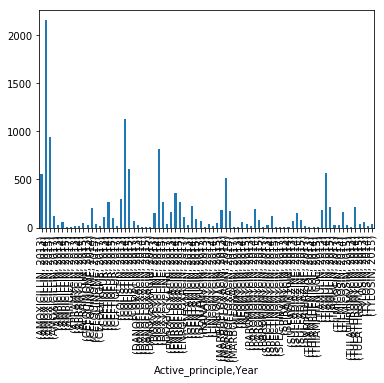

In [82]:
combination1.groupby(['Active_principle', 'Year']).Result.count().plot(kind='bar')

### Pre-processing

In [ ]:
# Dealing with catorical data

In [88]:
# Binarization

In [89]:
from sklearn import preprocessing
import numpy as np

In [ ]:
# bindata = preprocessing.Binarizer(threshold=1.5).trasform(combination1)

In [90]:
# Mean Removal

In [100]:
# Scaling with MinMaxScaler

In [102]:
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_minmax = minmax_scaler.fit_transform(combination1)

ValueError: could not convert string to float: 'RESPIRATORIE'